# 지도 학습
## 서포트 벡터 머신(Support Vector Machine, SVM)
  
###### 2023-12-20 KH.LIM @Cheongju
###### 딥러닝 파이토치 교과서 참조

서포트 벡터 머신은 부뉴를 위한 기준선을 정의하는 모델  
즉, 새로운 데이터가 나타나면 결정 경계(기준선)를 기준으로 경계의 어느 쪽에 속하는지 분류  
[외부 참조 링크](https://thebook.io/080289/0100/)

결정경계 : 데이터 분류를 위한 기준선  
마진 : 결정 경계와 서포트 벡터 사이의 거리  
서포트 벡터 : 결정 경계와 가까이 있는 데이터  
최적의 결정 경계는 마진을 최대로 해야 함

이상치(패턴에서 벗어난 값)를 잘 다루는 것이 중요. 이상치를 허용하지 않는 것을 하드 마진, 어느정도 이상치들이 마진 안에 포함되는 것을 허용하는 것을 소프트 마진 이라고 함

![SVM](../ML02_SupportVectorMachine/img/svm_01.png) ![](../ML02_SupportVectorMachine/img/svm_02.png)  
<출처. 파이토치교과서, https://thebook.io/080289/0101/>

#### 서포트 벡터 머신 분석 절차
라이브러리 호출 --> 데이터셋 로딩 --> 훈련과 검증 데이터셋 분리 --> 모델 생성 --> 검증 데이터 예측

In [4]:
# !pip install tensorflow

     ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
     --------------------------------------- 1.4/300.9 MB 44.8 MB/s eta 0:00:07
      -------------------------------------- 4.8/300.9 MB 60.9 MB/s eta 0:00:05
     - ------------------------------------- 8.0/300.9 MB 63.6 MB/s eta 0:00:05
     - ------------------------------------ 10.2/300.9 MB 64.9 MB/s eta 0:00:05
     - ------------------------------------ 13.2/300.9 MB 65.2 MB/s eta 0:00:05
     -- ----------------------------------- 16.1/300.9 MB 65.6 MB/s eta 0:00:05
     -- ----------------------------------- 18.5/300.9 MB 65.2 MB/s eta 0:00:05
     -- ----------------------------------- 19.4/300.9 MB 59.5 MB/s eta 0:00:05
     -- ----------------------------------- 23.1/300.9 MB 65.6 MB/s eta 0:00:05
     -- ----------------------------------- 23.1/300.9 MB 65.6 MB/s eta 0:00:05
     --- ---------------------------------- 24.2/300.9 MB 43.5 MB/s eta 0:00:07
     --- ---------------------------------- 27.

In [5]:
# 라이브러리 로드

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection

import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# TF_CPP_MIN_LOG_LEVEL : 환경 변수 사용하여 로깅을 제어(기본값은 0으로 모든 로그 표시, 1은 INFO 로그 필터링, 2는 Warning 로그 필터링, 3은 Error 로그 필터링)

In [21]:
# 테이터셋 분리

iris = datasets.load_iris()    # 사이킷런에서 제공하는 iris 데이터 호출

x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, 
                                                                    iris.target, 
                                                                    test_size=0.6, 
                                                                   random_state=42)

In [7]:
# SVM 모델에 대한 정확도

svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5)     #SVM은 선형 분류와 비선형 분류를 지원
svm.fit(x_train, y_train)             # 훈련 데이터를 사용하여 SVM 분류기 훈련
predictions = svm.predict(x_test)     # 모델을 사용하여 테스트 데이터에서 예측
score = metrics.accuracy_score(y_test, predictions)       # 테스트 데이터 (예측) 정확도 측정
print('정확도: {0:f}'.format(score))


정확도: 0.988889


보완해야 할 사항 :   
SVM 모델 훈련 완료, 테스트 데이터 예측 정확도도 확인하였으나,  
SVM의 사용 목적인 분류를 위한 기준선 설정인데, 이 기준선 설정이 어떻게 결정된 것이고 이를 확인할 수 있는 방법까지 연구 필요

### SVM 추가 진행  
[외부 참조 링크](https://blog.ex-em.com/1784)

In [9]:
from matplotlib import cm

In [13]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [71]:
# iris 데이터셋은 위에서 이미 로드됨
# 꽃잎 길이와 너비만 추출

X = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64)

# SVM 모델 설정
svm_clf = Pipeline([("scaler", StandardScaler()), ("linear_svc", SVC(C=1, kernel= 'linear'))])  # C 마진오류 조정을 위한 하이퍼파라미터, SVM모델이 과대적합이라면 C를 감소시켜 모델을 규제할 수 있다.

# 모델 훈련
svm_clf.fit(X,y)

#모델 예측
svm_clf.predict([[5.5, 1.7]])

array([1.])

[데이터셋 참조](https://ai-times.tistory.com/418)
붓꽃 데이터셋은 꽃잎의 크기 정보와 종류에 대한 값이 들어 있다. 

C값을 다르게 하여 SVM마진을 계산. 아래 코드에서 C값은 penalty라는 객체로 표현(sklearn 공식 페이지의 예시)  
[sklearn 사이트 참조](https://scikit-learn.org/stable/modules/svm.html#classification)

In [72]:
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

C:\Users\AI-space\AppData\Local\Temp\ipykernel_12188\1979852579.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yy_down, "k--", color="blue")
C:\Users\AI-space\AppData\Local\Temp\ipykernel_12188\1979852579.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yy_up, "k--", color="blue")
C:\Users\AI-space\AppData\Local\Temp\ipykernel_12188\1979852579.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("RdBu"),
C:\Users\AI-space\AppData\Local\Temp\ipykernel_12188\1979852579.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 

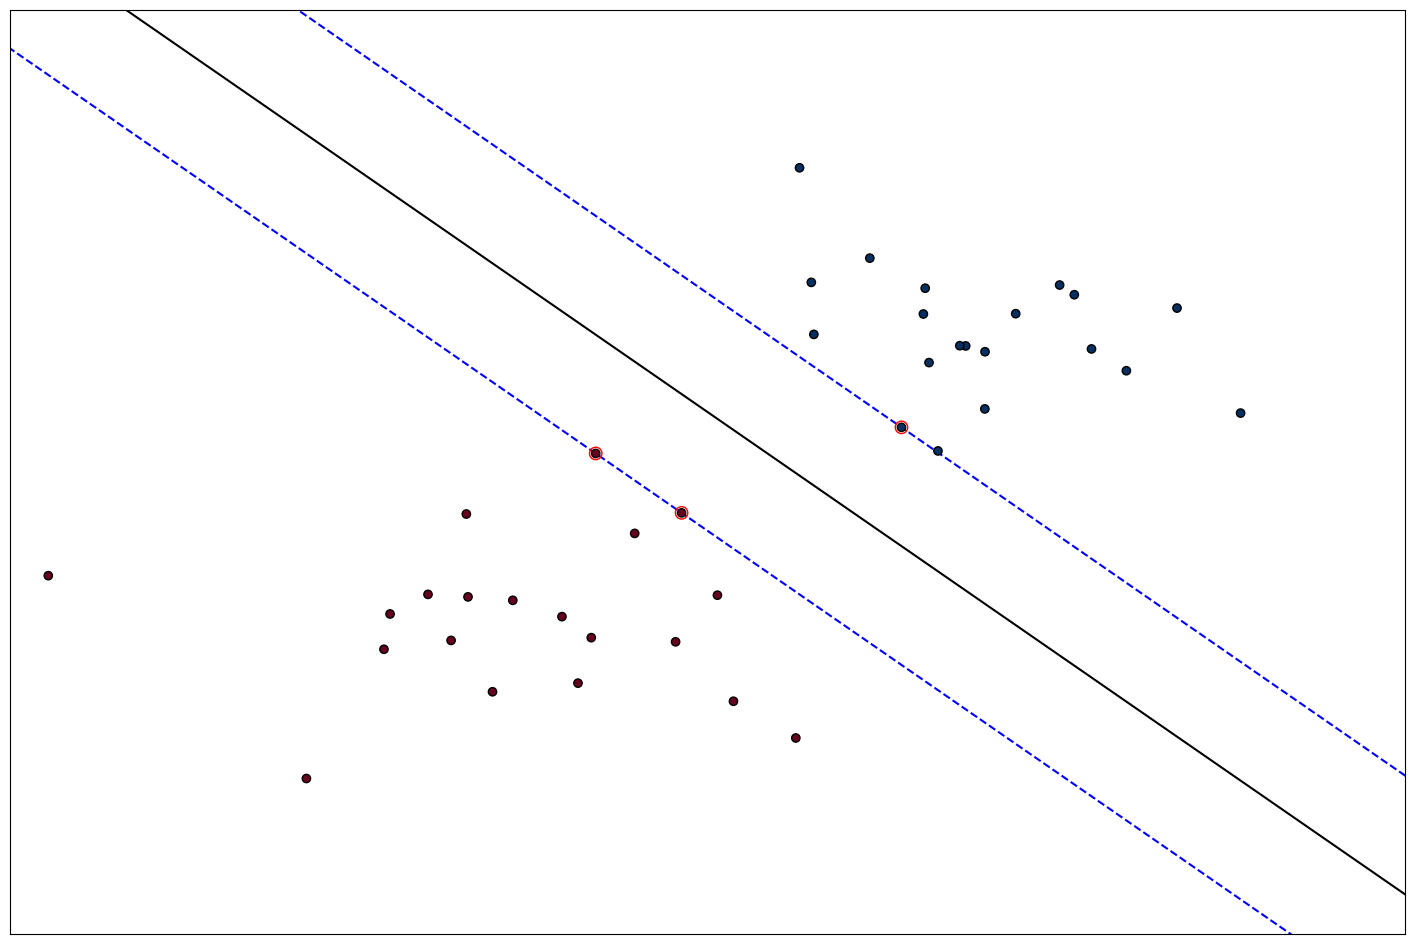

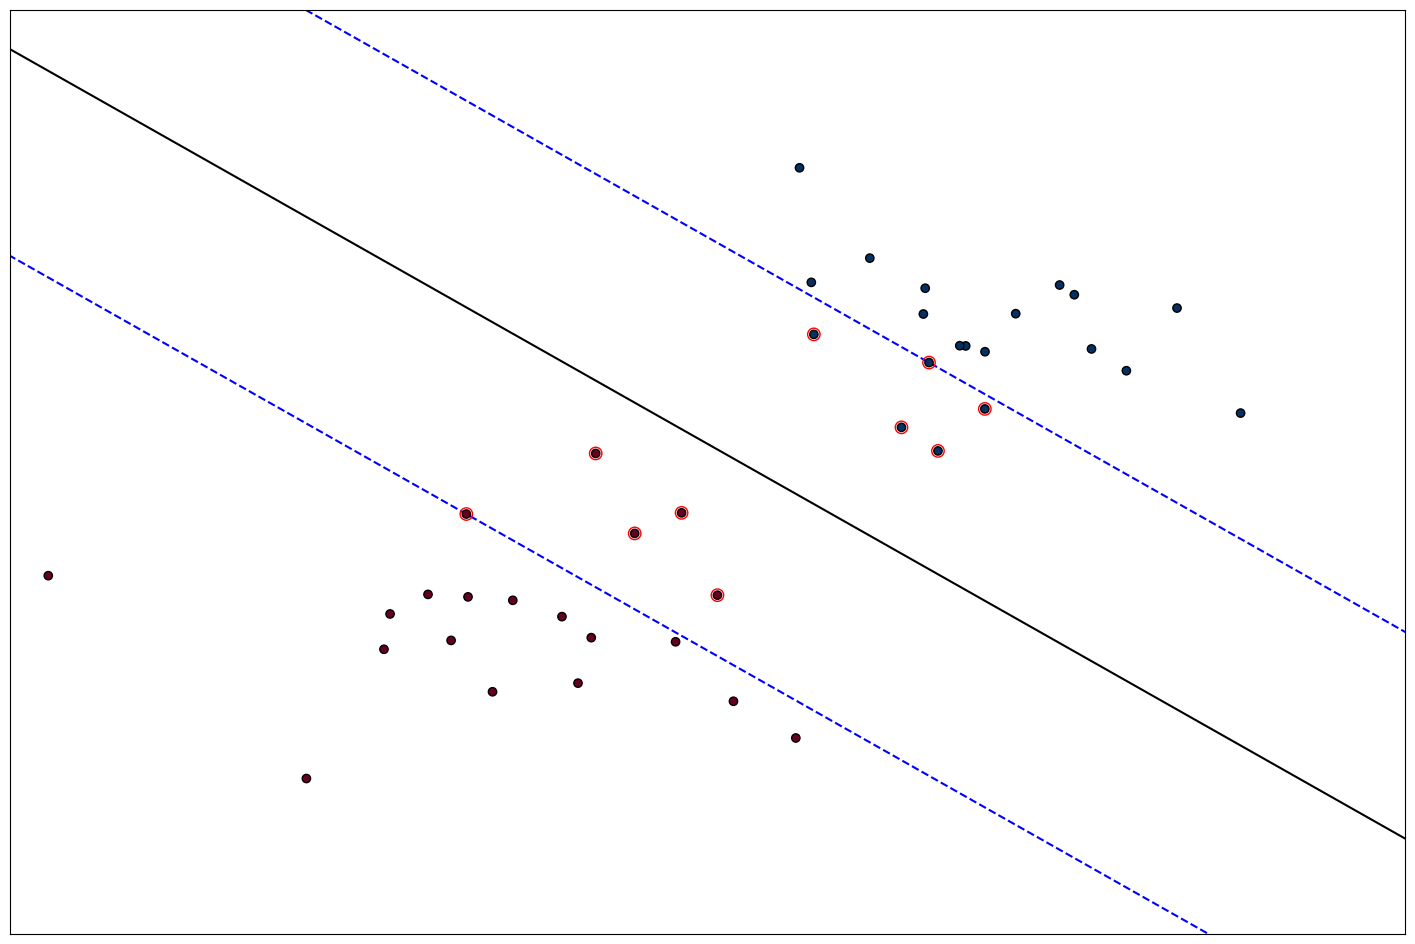

In [81]:
# 40개 포인트 생성
np.random.seed(0)
X = np.r_[np.random.randn(20,2) - [2,2], np.random.randn(20,2) + [2,2]]
Y = [0] * 20 + [1] * 20

# figure number 지정

fignum = 1

# 모델 훈련

for name, penalty in (("unreg", 1), ("reg", 0.05)):
    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X,Y)

    # 초평면 설정
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # 마진의 크기 설정
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # 그래프 그리기
    plt.figure(fignum, figsize=(18, 12))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--", color="blue")
    plt.plot(xx, yy_up, "k--", color="blue")

    plt.scatter(
        clf.support_vectors_[:,0],
        clf.support_vectors_[:,1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="red",
        cmap=cm.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:,0], X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max =6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z= clf.decision_function(xy).reshape(XX.shape)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

C=0.05 일 때 마진 오류가 높을 수 있지만 일반화가 더 잘됨. 비선형 SVM 분류를 하고 싶다면 from sklearn.svm import SVC 이후 모델 생성 시 SVC(kernel = 'poly')로 설정하면 됨.

  
## SVM 회귀  
SVM회귀의 원리는 분류의 목표와 반대. 일정한 마진 오류 안에서 가능한 많은 샘플이 들어가도록 학습하는 것

In [82]:
from sklearn.svm import LinearSVR

#데이터 생성
np.random.seed(42)
m = 100
X = 3 * np.random.rand(m, 1)
y = (8 * 3 * X + np.random.randn(m,1)).ravel()

# 모델 훈련
svm_reg = LinearSVR(epsilon= 1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

C:\Users\AI-space\AppData\Local\Temp\ipykernel_12188\3833216274.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(X, y_pred + svm_reg.epsilon, "k--", color = "red")
C:\Users\AI-space\AppData\Local\Temp\ipykernel_12188\3833216274.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(X, y_pred - svm_reg.epsilon, "k--", color = "red")


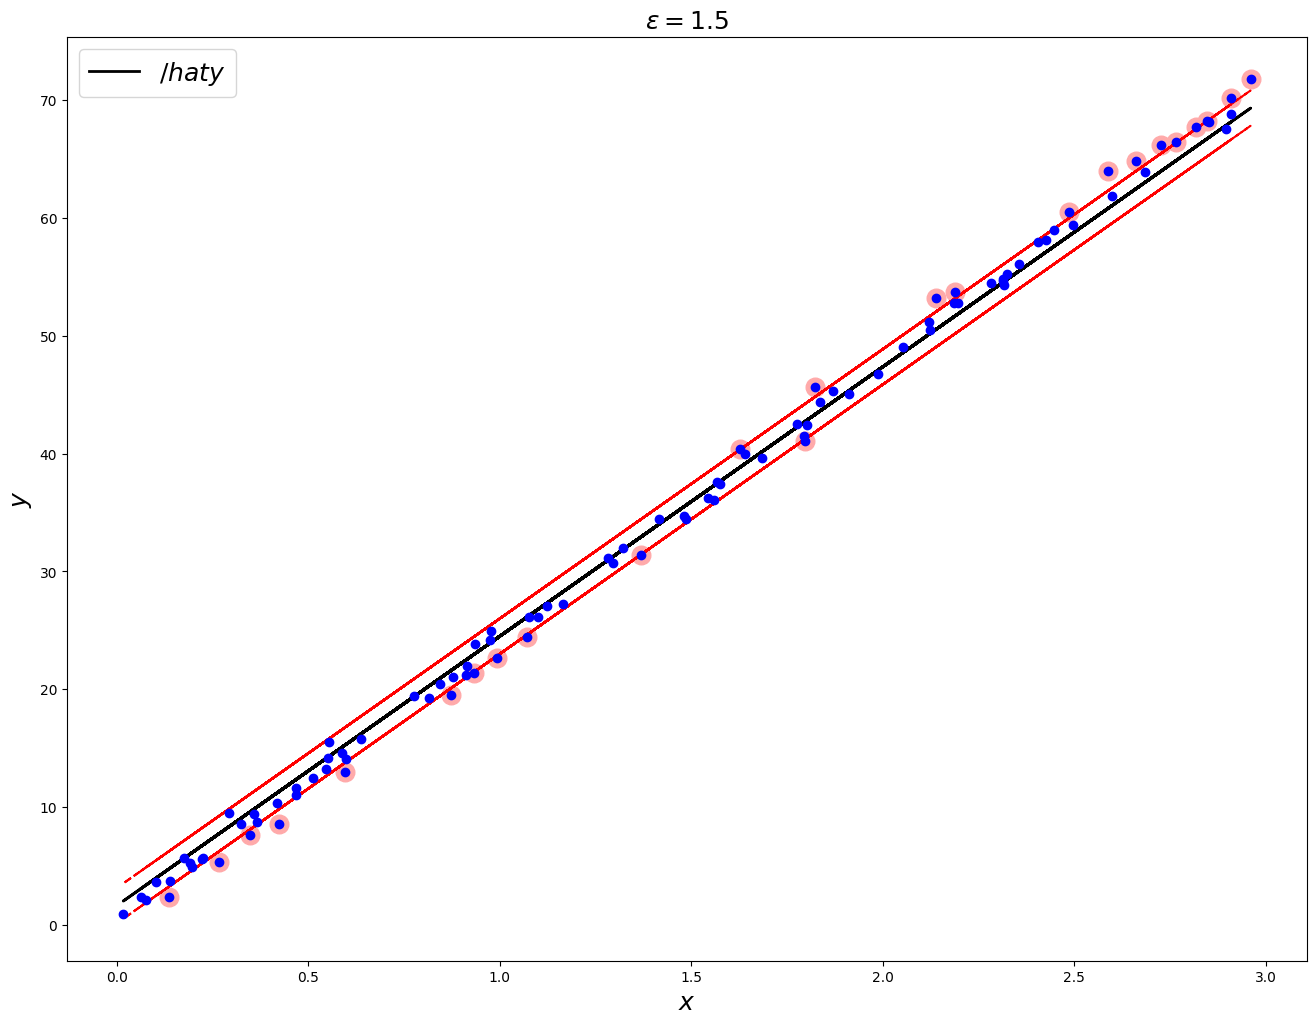

In [89]:
# 서포트 벡터 함수 지정
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y-y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg.support_ = find_support_vectors(svm_reg, X, y)


# 그래프 그리기
def plot_svm_regression(svm_reg, X, y, axes):
    y_pred = svm_reg.predict(X)
    plt.figure(figsize=(16,12))
    plt.plot(X, y_pred, "k-", linewidth=2, label=r"$/hat{y}$")
    plt.plot(X, y_pred + svm_reg.epsilon, "k--", color = "red")
    plt.plot(X, y_pred - svm_reg.epsilon, "k--", color = "red")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x$", fontsize=18)
    plt.ylabel(r"$y$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    
plot_svm_regression(svm_reg, X, y, [0, 3, 5, 16])
plt.title(r"$\epsilon = 1.5$", fontsize=18)
plt.show()

SVM 회귀 역시 kernel 트릭으로 비선형 회귀가 가능하다. LinearSVR 대신 from sklearn.svm import SVR이후 모델 생성시 SVR(kernel="poly")로 지정해 주면 됨